In [90]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [91]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
train = pd.read_csv('/content/drive/MyDrive/Datasets/Titanic/train.csv')


In [93]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**FINDING NaN VALUES**







In [94]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


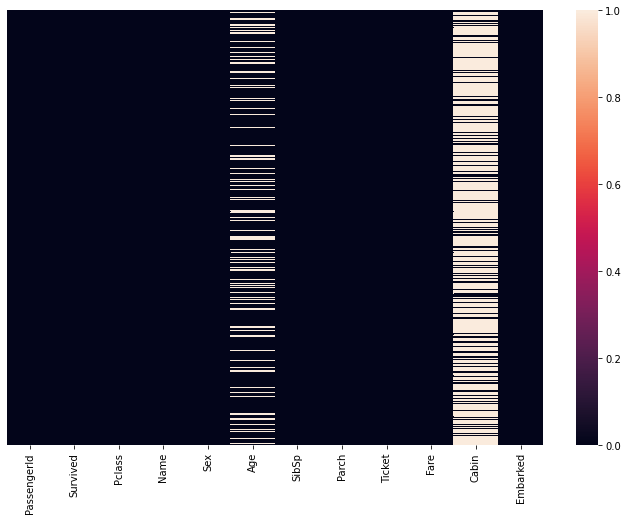

In [95]:
plt.figure( figsize= (12,8))
sns.heatmap(train.isnull(),yticklabels= False)


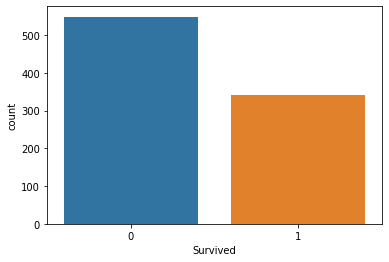

In [96]:
sns.countplot(x = 'Survived', data = train)

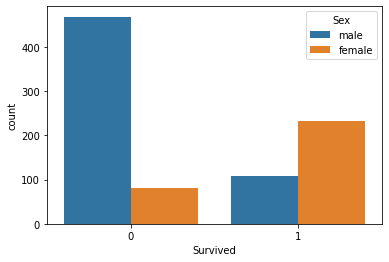

In [97]:
sns.countplot(x = 'Survived', data = train, hue = 'Sex')

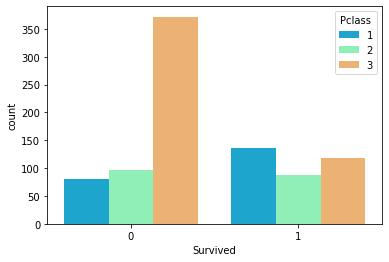

In [98]:
sns.countplot(x = 'Survived', data = train, hue = 'Pclass', palette='rainbow')

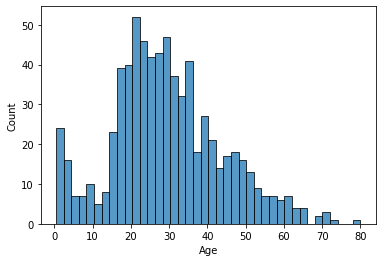

In [99]:
#Dist plot for age
sns.histplot(train['Age'].dropna(), bins = 40, kde= False)

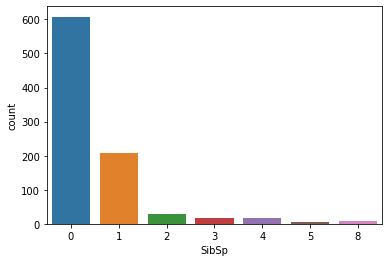

In [100]:
sns.countplot(x = 'SibSp', data = train)

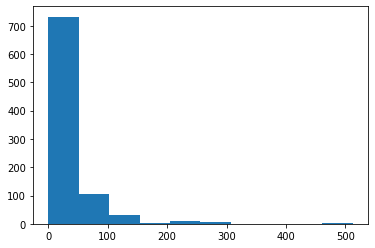

In [101]:
# sns.histplot(train['Fare'])
train['Fare'].hist( grid = False)

DATA CLEANING( Removing Nans)

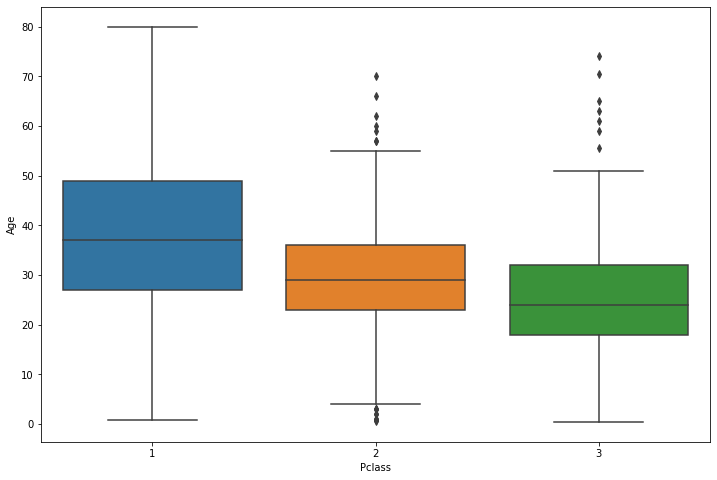

In [102]:
#Box Plot -> 25%, mean , 75% values 
plt.figure( figsize=(12, 8))
sns.boxplot(x = 'Pclass', y= 'Age', data = train)

In [103]:
def calc_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    
    if Pclass == 2:
      return 29
    
    else:
      return 24

  else:
    return Age    

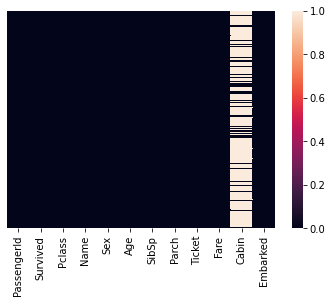

In [104]:
train['Age'] = train[['Age', 'Pclass']].apply(calc_age, axis =1)
sns.heatmap(train.isnull(),yticklabels= False)

In [105]:
#Since a lot of NaN in Cabin , it is safer to just drop this column.
train.drop('Cabin', axis = 1, inplace = True)


In [106]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


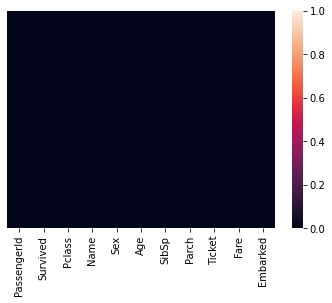

In [107]:
sns.heatmap(train.isnull(),yticklabels= False)

Converting Categorical Feature to Particular Values

In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [109]:
pd.get_dummies(train['Embarked'],drop_first=True).head()
# Dummy Trap
# Dont need first col as it can be rep as 0,0

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [110]:
sex = pd.get_dummies(train['Sex'], drop_first= True)
embarked = pd.get_dummies(train['Embarked'], drop_first= True)
#Creating new col with dummies

In [111]:
train.drop(['Name', 'Sex', 'Embarked', 'Ticket'], axis =1, inplace = True)

In [112]:
train.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
5,6,0,3,24.0,0,0,8.4583
6,7,0,1,54.0,0,0,51.8625
7,8,0,3,2.0,3,1,21.0750
8,9,1,3,27.0,0,2,11.1333
9,10,1,2,14.0,1,0,30.0708


In [113]:
train = pd.concat([train, sex, embarked], axis =1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
